## Data Science Academy Telkomsel
### Data Visualization Homework
- - -
#### Prepared by: Wahyu Sejati Roso
#### Jakarta, 4 November 2019
- - -

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('csv/train.csv')

In [4]:
%matplotlib inline

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [310]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Calculate family size by adding number of sibling / spouse and number of childer or parch
data['family_size'] = data['SibSp'] + data['Parch'] + 1

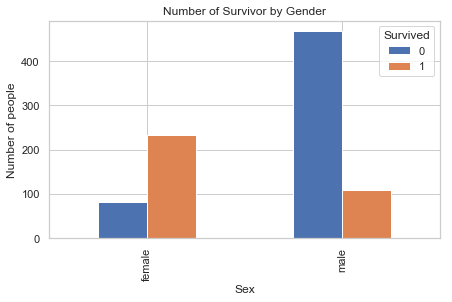

In [27]:
fig, ax = plt.subplots(figsize=(7,4))

data_plot = data.groupby(by=['Sex','Survived'])['PassengerId'].count().reset_index(name='count')
data_plot = data_plot.pivot(index='Sex',columns='Survived',values='count')
ax.set_title('Number of Survivor by Gender')
ax.set_ylabel('Number of people')
data_plot.plot.bar(ax=ax)

Women have higher chance of survival

Text(0.5, 0, 'Pearson Correlation Score')

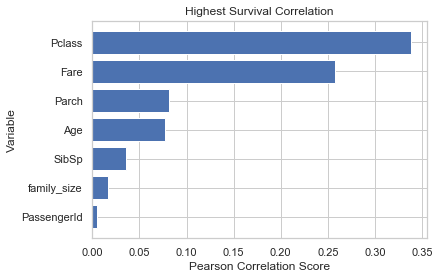

In [29]:
corr = pd.DataFrame(data.corr().abs()['Survived'].sort_values(ascending=True)[:-1])

fig, ax = plt.subplots()
ax.barh(corr.index,corr['Survived'], align='center')
ax.set_title('Highest Survival Correlation')
ax.set_ylabel('Variable')
ax.set_xlabel('Pearson Correlation Score')

Ticket class and passenger fare is the highest correlated varible to survivorhsip.

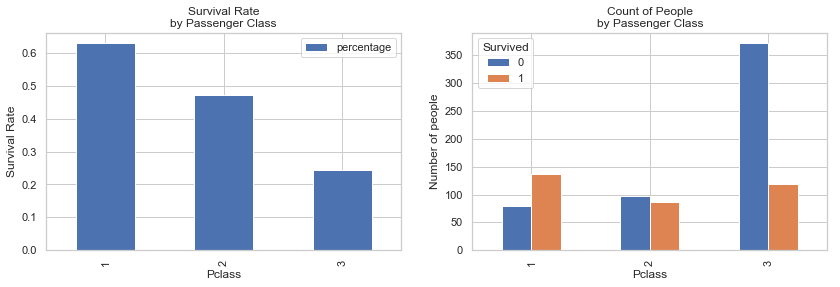

In [30]:
data['Pclass']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
data_plot = data.groupby(by=['Pclass','Survived'])['PassengerId'].count().reset_index(name='count')

survived = data_plot[data_plot['Survived']==1].loc[:,('Pclass','count')].reset_index(drop=True)
total = data_plot.groupby('Pclass')['count'].sum().reset_index()
survived['percentage'] = survived['count']/total['count']
survived = survived.drop('count',axis = 1)
survived = survived.set_index('Pclass')
axes[0].set_title('Survival Rate\nby Passenger Class')
axes[0].set_ylabel('Survival Rate')
survived.plot.bar(ax=axes[0])

data_plot = data.groupby(by=['Pclass','Survived'])['PassengerId'].count().reset_index(name='count')
data_plot = data_plot.pivot(index='Pclass',columns='Survived',values='count')
axes[1].set_title('Count of People\nby Passenger Class')
axes[1].set_ylabel('Number of people')
data_plot.plot.bar(ax=axes[1])

Passenger class 1 has highest chance of survive followed by class 2 and 3 being the worst.

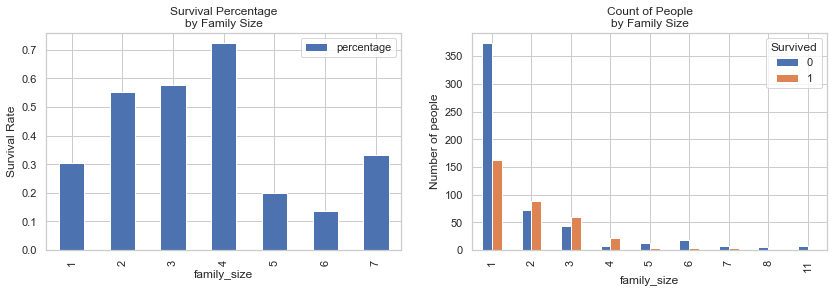

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

data_plot = data.groupby(by=['family_size','Survived'])['PassengerId'].count().reset_index(name='count')

survived = data_plot[data_plot['Survived']==1].loc[:,('family_size','count')].reset_index(drop=True)
total = data_plot.groupby('family_size')['count'].sum().reset_index()
survived['percentage'] = survived['count']/total['count']
survived = survived.drop('count',axis = 1)
survived = survived.set_index('family_size')
axes[0].set_title('Survival Percentage\nby Family Size')
axes[0].set_ylabel('Survival Rate')
survived.plot.bar(ax=axes[0])

pivot_data = data_plot.pivot(index='family_size',columns='Survived',values='count')
axes[1].set_title('Count of People\nby Family Size')
axes[1].set_ylabel('Number of people')
pivot_data.plot.bar(ax=axes[1])

Passenger that boarding with small number of family (2 to 4) are more likely to survive.

Text(0, 0.5, 'Fare')

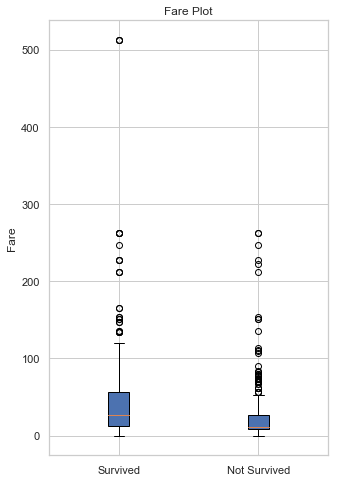

In [33]:
fig1, ax1 = plt.subplots(figsize=(5,8))
plot_data = [data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']]
ax1.set_title('Fare Plot')
ax1.boxplot(plot_data,patch_artist=True)
ax1.set_xticklabels(['Survived', 'Not Survived'])
ax1.set_ylabel('Fare')

In general, survived passenger paid more fare. It turns out money can buy safety at some degree. 

Text(0, 0.5, 'Age')

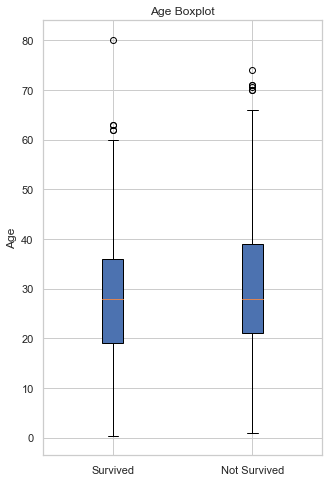

In [34]:
fig1, ax1 = plt.subplots(figsize=(5,8))
plot_data = [data[data['Survived']==1]['Age'].dropna(),data[data['Survived']==0]['Age'].dropna()]
ax1.set_title('Age Boxplot')
ax1.boxplot(plot_data,patch_artist=True)
ax1.set_xticklabels(['Survived', 'Not Survived'])
ax1.set_ylabel('Age')

The age distribution of the survivor is more centralized to the younger age.

Text(0, 0.5, 'Number of people')

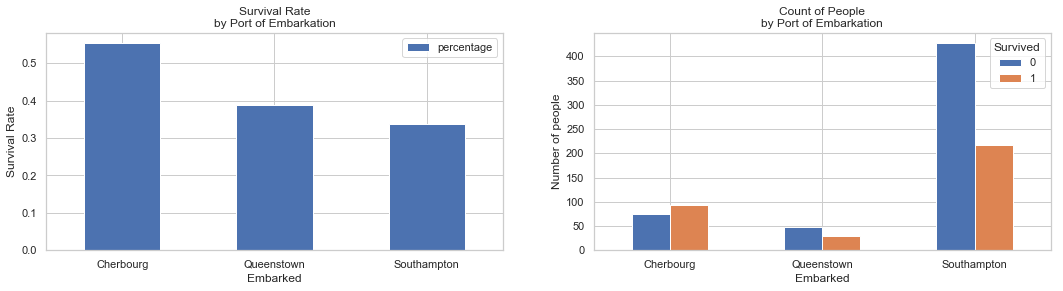

In [35]:
data_plot = data.groupby(by=['Embarked','Survived'])['PassengerId'].count().reset_index(name='count')
data_plot.loc[data_plot['Embarked']=='C','Embarked'] = 'Cherbourg'
data_plot.loc[data_plot['Embarked']=='Q','Embarked'] = 'Queenstown'
data_plot.loc[data_plot['Embarked']=='S','Embarked'] = 'Southampton'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,4))

survived = data_plot[data_plot['Survived']==1].loc[:,('Embarked','count')].reset_index(drop=True)
total = data_plot.groupby('Embarked')['count'].sum().reset_index()
survived['percentage'] = survived['count']/total['count']
survived = survived.drop('count',axis = 1)
survived = survived.set_index('Embarked')
axes[0].set_title('Survival Rate\nby Port of Embarkation')
survived.plot.bar(ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_ylabel('Survival Rate')

data_plot = data_plot.pivot(index='Embarked',columns='Survived',values='count')
axes[1].set_title('Count of People\nby Port of Embarkation')
data_plot.plot.bar(ax=axes[1])
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylabel('Number of people')

People embarking from Southampton Port has the enormous number of casualty and lowest chance of survival compared to other port.

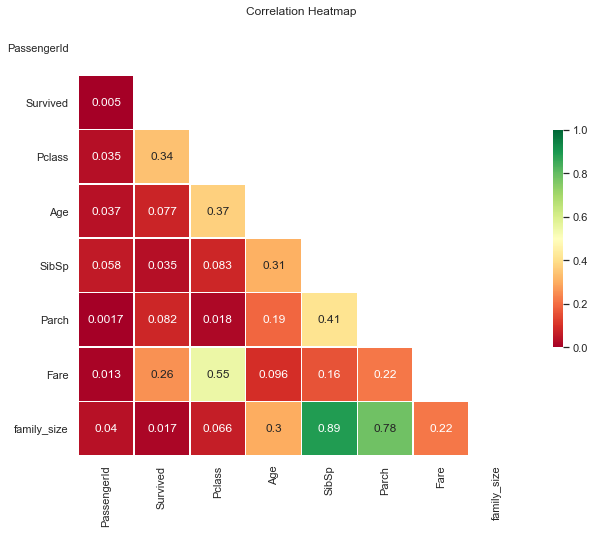

In [14]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data.corr().abs(),annot=True,cmap='RdYlGn',mask=mask,linewidths=.5,cbar_kws={"shrink": .5})
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Heatmap')
plt.show()

Since there is susbtantial correlation between survival, fare and passenger class, lets explore their relationship through multiboxplot.

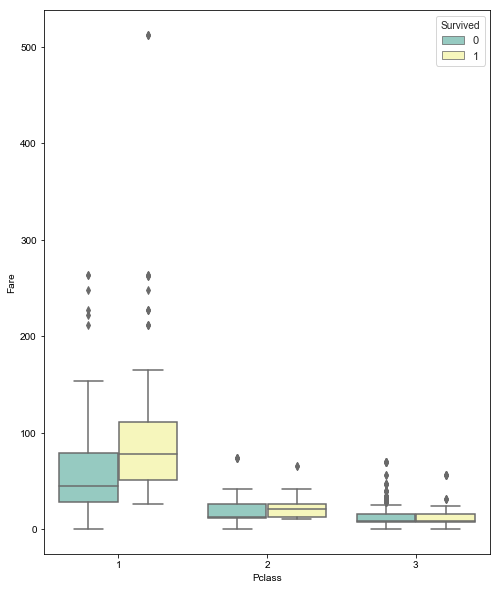

In [6]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
sns.set(style="whitegrid")
ax1 = sns.boxplot(x="Pclass", y="Fare", hue="Survived",data=data, palette="Set3",ax=ax1)

From boxplot above we can see that even among first class passenger, survived passsenger in first class pay more fare than the others.